**DATA SCIENCE PROJECTs**

**AUTHOR: Agnel Salve**

**TASK 2: Prediction using Unsupervised ML**

From the given "Iris" dataset, predict the optimum number of clusters and represent it visually.

Unsupervised ML is a type of ML that looks for previously undetected patterns in a dataset with no pre-existing labels and with a minimum of human spervision. In contrast to supervised ML that usually makes use of human - labelled data, unspervised ML, also known as self organisation allows for modelling of probability densities over inputs.

**IMPORT DATASET AND LIBRARIES**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
sns.set()
from sklearn import datasets
from sklearn.cluster import KMeans

We are reading the Iris dataset using the datasets.load_iris() method and storing the data in a data frame iris_df.After, feeding the data frame iris_df, we use head() method on the dataset to see its first 10 records.

In [ ]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


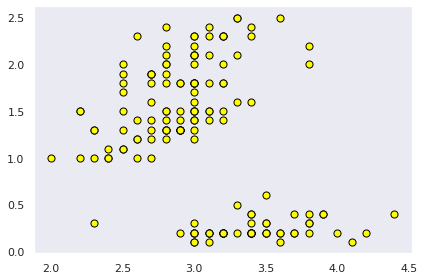

In [ ]:
#Performing scatter plot
x = iris.data
y = iris.target

plt.scatter(x[:,1], x[:,3], color='yellow',marker='o', edgecolor='black', s=50)
plt.grid()
plt.tight_layout()
plt.show()

Now, we select all sepal length, sepal width, petal length, and petal width of the datset in a varable called x so that we can train our model. Using iloc function on iris_df, and the column index (0,1,2,3), we get

In [ ]:
x = iris_df.iloc[:, [0,1,2,3]].values

We are using the Elbow method, to find the optimal number of clusters.

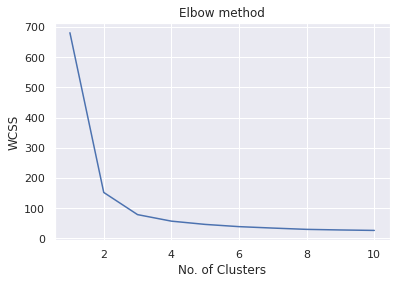

In [61]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init ='k-means++',
                  max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

#plotting
plt.plot(range(1,11), wcss)
plt.title('Elbow method')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

Now, we can see the optimal value of k is between 2 and 4.

# **IMPLEMENT K-MEANS CLUSTERING WITH k=3**

In [62]:
#Applying k-means
kmeans = KMeans (n_clusters = 3,init = 'k-means++',
                 max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [63]:
kmeans.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

Visualising the three clusters

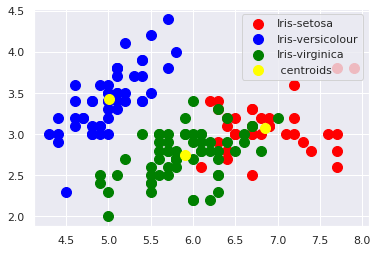

In [70]:
#First 2 columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0,1],
            s=100, c='red', label='Iris-setosa')
plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1],
            s=100, c='blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2 ,1],
            s=100, c ='green', label ='Iris-virginica')

#centroids
plt.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:,1],
            s = 100, c ='yellow', label =' centroids')
plt.legend()